<ipython-input-7-56da2230567c>:44: RuntimeWarning: invalid value encountered in true_divide
  Af = 2*np.abs(v[nt-1, :nx]) / (A * source)  # Amplification factor


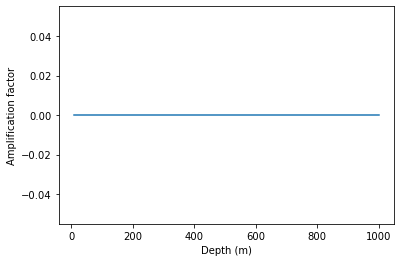

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Input parameters
T = 10  # Total simulation time (s)
dt = 0.01  # Time step (s)
L = 1000  # Length of the soil layer (m)
dx = 10  # Grid spacing (m)
Vs = 300  # Shear wave velocity (m/s)
rho = 2000  # Density of the soil (kg/m^3)
zr = 500  # Depth of the bedrock (m)
f0 = 5  # Dominant frequency of the input motion (Hz)
A = 1  # Amplitude of the input motion (m/s^2)

# Derived parameters
nt = int(T/dt) + 1  # Number of time steps
nx = int(L/dx) + 1  # Number of grid points
C = Vs*dt/dx  # Courant number
r = rho*dx/dt  # Density factor
Z = np.exp(-(z[:, np.newaxis]-zr)*np.sqrt(np.pi*f0/(2*Vs)))  # Impedance ratio

# Initialize arrays
u = np.zeros((nt, nx))  # Particle velocity
v = np.zeros((nt, nx))  # Displacement
source = A * np.sin(2*np.pi*f0*np.linspace(0, T, nx))  # Input motion

# Apply the input motion at the surface
u = np.zeros((nt, nx))  # Particle velocity
u[0, :] = np.ones(nx) * source[0]  # Apply the input motion at the surface

#u[0, :] = source

# Solve the wave propagation equation
for n in range(1, nt):
    for i in range(1, nx-1):
        u[n, i] = 2*u[n-1, i] - u[n-2, i] + C**2 * (v[n-1, i+1] - 2*v[n-1, i] + v[n-1, i-1])
    u[n, 0] = u[n, 1]  # Zero slope boundary condition at the surface
    u[n, nx-1] = u[n, nx-2]  # Zero slope boundary condition at the bedrock
    v[n, :] = v[n-1, :] + dt * u[n, :] / r

# Compute the amplification factor

Z = np.exp(-(z-zr)*np.sqrt(np.pi*f0/(2*Vs)))  # Impedance ratio
Af = 2*np.abs(v[nt-1, :nx]) / (A * source)  # Amplification factor

# Plot the results
plt.plot(z, Z*Af)
plt.xlabel('Depth (m)')
plt.ylabel('Amplification factor')
plt.show()


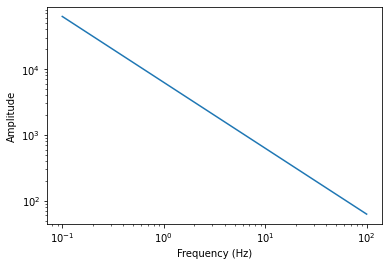

In [17]:
import numpy as np
import matplotlib.pyplot as plt
Vs = 200.0  # Shear wave velocity in m/s
rho = 2000.0  # Density in kg/m^3
depth = 10.0  # Depth in meters
Z = rho * Vs  # Impedance in kg/m^2/s
k = 2 * np.pi * freq / Vs  # Wave number in radians/m
amp_factor = np.exp(-1j * k * depth) * (1 + (Z * k / 2) / (1j * freq))  # Complex amplification factor
freq_range = np.logspace(-1, 2, 100)  # Frequency range for plotting
amp_factor_range = np.exp(-1j * k * depth) * (1 + (Z * k / 2) / (1j * freq_range))  # Amplification factor for frequency range
plt.loglog(freq_range, abs(amp_factor_range))  # Plot amplitude vs frequency on a log-log scale
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [12]:
freq_range = np.logspace(-1, 2, 100)  # Frequency range for plotting
amp_factor_interp = np.interp(freq_range, freq[1:-1], amp_factor)  # Interpolate the amplification factor to the frequency range
plt.loglog(freq_range, amp_factor_interp)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplification factor')
plt.show()


TypeError: 'float' object is not subscriptable

C:\Users\s2122917\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


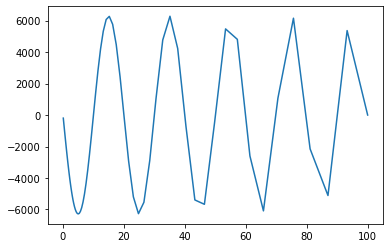

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Vs = 200.0  # Shear wave velocity in m/s
rho = 2000.0  # Density in kg/m^3
depth = 10.0  # Depth in meters
freq = np.logspace(-1, 2, 100)  # Frequency range for plotting
Z = rho * Vs  # Impedance in kg/m^2/s
k = 2 * np.pi * freq / Vs  # Wave number in radians/m
amp_factor = np.exp(-1j * k * depth) * (1 + (Z * k / 2) / (1j * freq))  # Complex amplification factor for frequency range
plt.plot(freq,amp_factor)



In [23]:
import math

# Define constants
rho = 2700  # density of the medium in kg/m^3
mu = 3.3e10  # shear modulus in Pa

# Define earthquake parameters
Mw = 7.6  # Magnitude of earthquake
f = 1  # frequency in Hz


In [24]:
# Define distance range
distances = range(1, 1001, 10)  # distances from 1 km to 1000 km in steps of 10 km

# Calculate maximum amplitude of ground motion at each distance
amplitudes = []
for d in distances:
    # Calculate seismic moment
    M0 = 10**(1.5*Mw + 9.1)

    # Calculate wavelength
    wavelength = 2 * math.pi * mu / (rho * f)

    # Calculate geometric spreading factor
    G = 1 / d

    # Calculate maximum amplitude of ground motion
    A = (2.7 * M0 * G) / (4 * math.pi * rho * mu * wavelength**2)

    amplitudes.append(A)


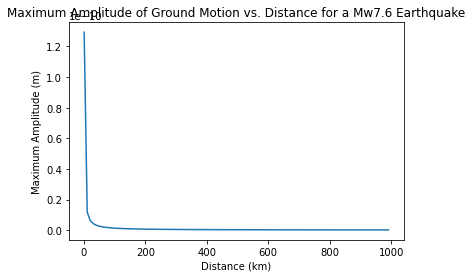

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
rho = 2700  # density of the medium in kg/m^3
mu = 3.3e10  # shear modulus in Pa
Mw = 7.6  # Magnitude of earthquake
f = 1  # frequency in Hz
M0 = 10**(1.5*Mw + 9.1)  # seismic moment

# Define distance range
distances = np.arange(1, 1001, 10)

# Calculate maximum amplitude of ground motion at each distance
wavelength = 2 * math.pi * mu / (rho * f)
G = 1 / distances
amplitudes = (2.7 * M0 * G) / (4 * math.pi * rho * mu * wavelength**2)

# Plot maximum amplitude of ground motion as a function of distance
plt.plot(distances, amplitudes)
plt.xlabel('Distance (km)')
plt.ylabel('Maximum Amplitude (m)')
plt.title('Maximum Amplitude of Ground Motion vs. Distance for a Mw7.6 Earthquake')
plt.show()



In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
freq = 1.0  # frequency of the sine wave in Hz
amp = 1.0  # amplitude of the sine wave
damping = 0.1  # damping factor
time = np.linspace(0, 10, 1000)  # time array from 0 to 10 seconds with 1000 samples


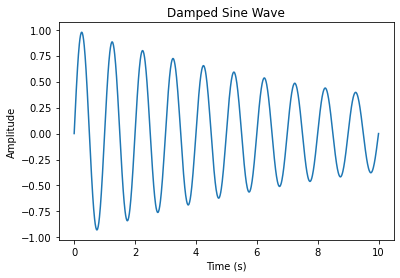

In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
freq = 1.0  # frequency of the sine wave in Hz
amp = 1.0  # amplitude of the sine wave
damping = 0.1  # damping factor
time = np.linspace(0, 10, 1000)  # time array from 0 to 10 seconds with 1000 samples
# Calculate the damped sine wave
damped_wave = amp * np.exp(-damping * time) * np.sin(2 * math.pi * freq * time)
# Plot the damped sine wave
plt.plot(time, damped_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damped Sine Wave')
plt.show()


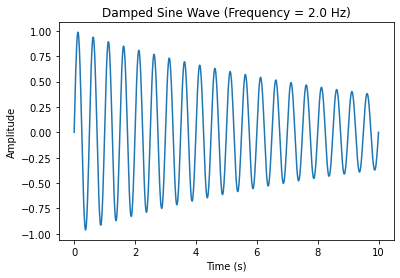

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
freq = 2.0  # frequency of the sine wave in Hz
amp = 1.0  # amplitude of the sine wave
damping = 0.1  # damping factor
time = np.linspace(0, 10, 1000)  # time array from 0 to 10 seconds with 1000 samples

# Calculate the damped sine wave
damped_wave = amp * np.exp(-damping * time) * np.sin(2 * math.pi * freq * time)

# Plot the damped sine wave
plt.plot(time, damped_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damped Sine Wave (Frequency = {} Hz)'.format(freq))
plt.show()


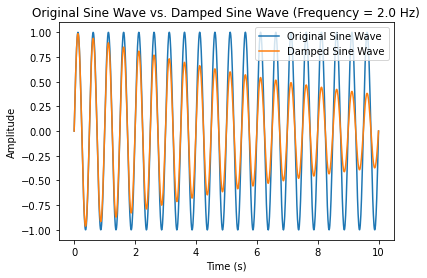

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
freq = 2.0  # frequency of the sine wave in Hz
amp = 1.0  # amplitude of the sine wave
damping = 0.1  # damping factor
time = np.linspace(0, 10, 1000)  # time array from 0 to 10 seconds with 1000 samples

# Calculate the original sine wave and the damped sine wave
sine_wave = amp * np.sin(2 * math.pi * freq * time)
damped_wave = amp * np.exp(-damping * time) * np.sin(2 * math.pi * freq * time)

# Plot the original sine wave and the damped sine wave
plt.plot(time, sine_wave, label='Original Sine Wave')
plt.plot(time, damped_wave, label='Damped Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Sine Wave vs. Damped Sine Wave (Frequency = {} Hz)'.format(freq))
plt.legend()
plt.show()


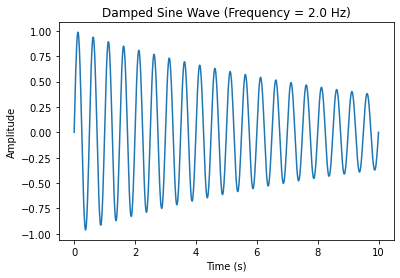

Elapsed time: 0.00026488304138183594 seconds


In [44]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
freq = 2.0  # frequency of the sine wave in Hz
amp = 1.0  # amplitude of the sine wave
damping = 0.1  # damping factor
time_ = np.linspace(0, 10, 1000)  # time array from 0 to 10 seconds with 1000 samples

# Start the timer
start_time = time.time()

# Calculate the damped sine wave
damped_wave = amp * np.exp(-damping * time_) * np.sin(2 * np.pi * freq * time_)

# Stop the timer
end_time = time.time()

# Plot the damped sine wave
plt.plot(time_, damped_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damped Sine Wave (Frequency = {} Hz)'.format(freq))
plt.show()

# Print the elapsed time
print("Elapsed time: {} seconds".format(end_time - start_time))


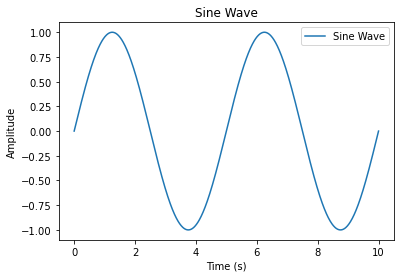

In [38]:
sine_wave = amp * np.sin(2 * math.pi * 0.2 * time)

plt.plot(time, sine_wave, label='Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave'.format(freq))
plt.legend()
plt.show()


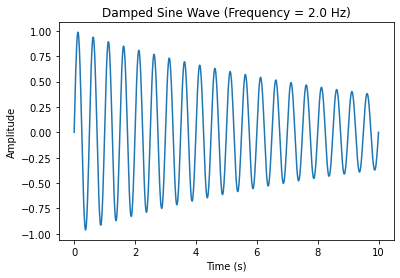

Elapsed time: 0.0008418560028076172 seconds


In [46]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
freq = 2.0  # frequency of the sine wave in Hz
amp = 1.0  # amplitude of the sine wave
damping = 0.1  # damping factor
time_ = np.linspace(0, 10, 1000)  # time array from 0 to 10 seconds with 1000 samples

# Start the timer
start_time = time.time()

# Calculate the damped sine wave
exponential = np.exp(-damping * time_)
damped_wave = amp * exponential * np.sin(2 * np.pi * freq * time_)

# Stop the timer
end_time = time.time()

# Plot the damped sine wave
plt.plot(time_, damped_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damped Sine Wave (Frequency = {} Hz)'.format(freq))
plt.show()

# Print the elapsed time
print("Elapsed time: {} seconds".format(end_time - start_time))


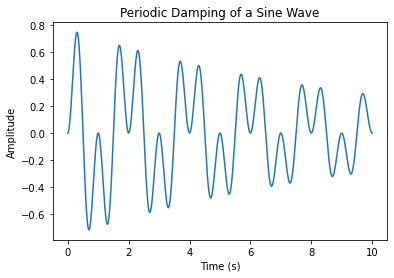

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the sine wave
freq = 1.0  # Hz
amplitude = 1.0
phase = 0.0

# Define the damping coefficient and damping frequency
damping_coeff = 0.1
damping_freq = 2.0 * np.pi * 0.5  # Hz

# Define the time array
time = np.linspace(0, 10, 1000)

# Calculate the amplitude of the damped sine wave at each time step using a sinusoidal decay function
damped_amplitude = amplitude * np.exp(-damping_coeff * time) * np.sin(2 * np.pi * freq * time + phase) * np.sin(damping_freq * time)

# Plot the damped sine wave as a function of time
plt.plot(time, damped_amplitude)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Periodic Damping of a Sine Wave')
plt.show()


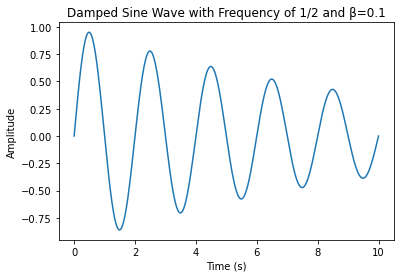

In [54]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 1000)  # generate 1000 time points between 0 and 10
beta = 0.1  # damping coefficient
y = np.sin(np.pi*t)  # sine wave equation
d = np.exp(-beta*t)  # damping function
y_damped = d * y  # damped sine wave equation

plt.plot(t, y_damped)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damped Sine Wave with Frequency of 1/2 and β=0.1')
plt.show()


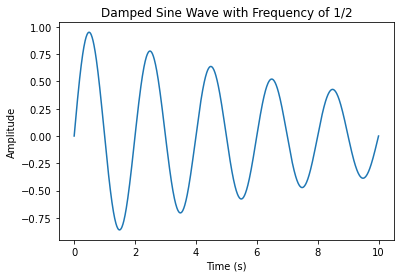

In [53]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 1000)  # generate 1000 time points between 0 and 10
beta = 0.1  # damping coefficient
y = np.exp(-beta*t) * np.sin(np.pi*t)  # damped sine wave equation

plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damped Sine Wave with Frequency of 1/2')
plt.show()


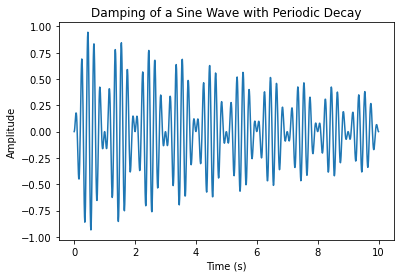

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the sine wave
freq = 0.5  # Hz
amplitude = 1.0
phase = 0.0

# Define the damping coefficient and periodic decay frequency
damping_coeff = 0.1
periodic_freq = 5.0  # Hz

# Define the time array
time = np.linspace(0, 10, 1000)

# Calculate the amplitude of the damped sine wave at each time step using a combination of exponential decay and periodic decay
exponential_decay = np.exp(-damping_coeff * time)
periodic_decay = np.sin(2 * np.pi * periodic_freq * time)
damped_amplitude = amplitude * exponential_decay * periodic_decay * np.sin(2 * np.pi * freq * time + phase)

# Plot the damped sine wave as a function of time
plt.plot(time, damped_amplitude)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damping of a Sine Wave with Periodic Decay')
plt.show()


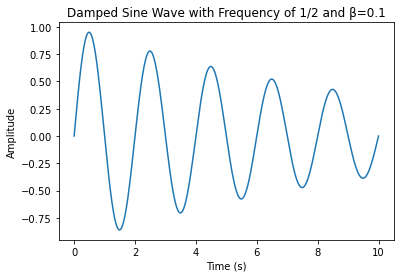

In [55]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 1000)  # generate 1000 time points between 0 and 10
beta = 0.1  # damping coefficient
y = np.sin(np.pi*t)  # sine wave equation
d = np.exp(-beta*t)  # damping function
y_damped = d * y  # damped sine wave equation

plt.plot(t, y_damped)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damped Sine Wave with Frequency of 1/2 and β=0.1')
plt.show()


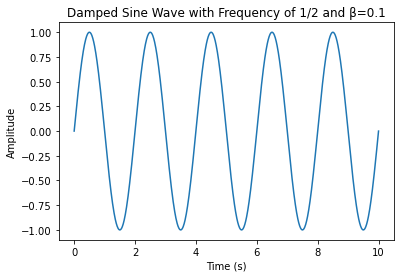

In [56]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 1000)  # generate 1000 time points between 0 and 10
beta = 0.1  # damping coefficient
y = np.sin(np.pi*t)  # sine wave equation


plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.show()


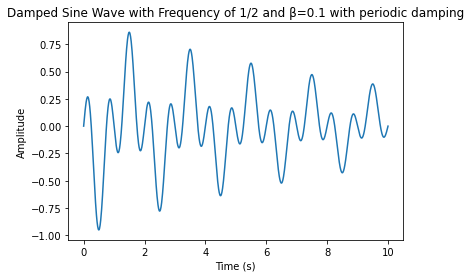

In [61]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 1000)  # generate 1000 time points between 0 and 10
beta = 0.1  # damping coefficient
y = np.sin(np.pi*t)  # sine wave equation
d = np.exp(-beta*t) * np.cos(2*np.pi*t)  # damped function with a periodic component
y_damped = d * y  # damped sine wave equation

plt.plot(t, y_damped)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damped Sine Wave with Frequency of 1/2 and β=0.1 with periodic damping')
plt.show()



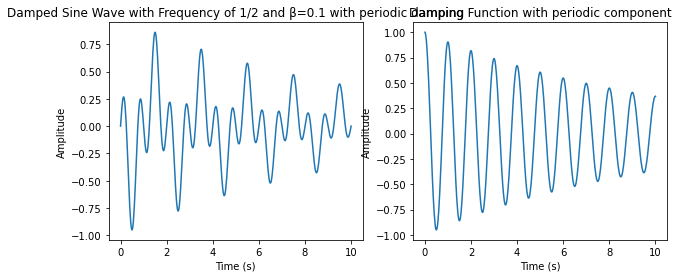

In [62]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 500)  # generate 500 time points between 0 and 10
beta = 0.1  # damping coefficient
y = np.sin(np.pi*t)  # sine wave equation
d = np.exp(-beta*t) * np.sin(2*np.pi*t + np.pi/2)  # damped function with a periodic component
y_damped = d * y  # damped sine wave equation

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))  # create a 1x2 subplot grid

ax[0].plot(t, y_damped)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Damped Sine Wave with Frequency of 1/2 and β=0.1 with periodic damping')

ax[1].plot(t, d)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Damping Function with periodic component')

plt.show()
